  Liquor Sales Data Analysis


### Step 1: Load necessary libraries

In [4]:
#pip install pyspark

In [2]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark import SparkContext

In [3]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName('Spark').getOrCreate()

In [4]:
sc = SparkContext.getOrCreate()

### Step 2: Load in the data from the CSV to a PySpark DF

In [5]:
#loading in the data
liquor_df = spark.read.csv("Iowa_Liquor_Sales.csv", header=True, inferSchema=True)
#show columns
liquor_df.columns

['invoice_line_no',
 'date',
 'store',
 'name',
 'address',
 'city',
 'zipcode',
 'store_location',
 'county_number',
 'county',
 'category',
 'category_name',
 'vendor_no',
 'vendor_name',
 'itemno',
 'item_desc',
 'pack',
 'bottle_volume_ml',
 'state_bottle_cost',
 'state_bottle_retail',
 'sale_bottles',
 'sale_dollars',
 'sale_liters',
 'sale_gallons']

In [6]:
#printing schema
liquor_df.printSchema()

root
 |-- invoice_line_no: string (nullable = true)
 |-- date: string (nullable = true)
 |-- store: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- store_location: string (nullable = true)
 |-- county_number: integer (nullable = true)
 |-- county: string (nullable = true)
 |-- category: integer (nullable = true)
 |-- category_name: string (nullable = true)
 |-- vendor_no: integer (nullable = true)
 |-- vendor_name: string (nullable = true)
 |-- itemno: integer (nullable = true)
 |-- item_desc: string (nullable = true)
 |-- pack: integer (nullable = true)
 |-- bottle_volume_ml: string (nullable = true)
 |-- state_bottle_cost: string (nullable = true)
 |-- state_bottle_retail: string (nullable = true)
 |-- sale_bottles: string (nullable = true)
 |-- sale_dollars: string (nullable = true)
 |-- sale_liters: string (nullable = true)
 |-- sale_gallons: string 

In [59]:
liquor_df.show(5)

+---------------+--------+-----+--------------------+--------------------+---------------+-------+--------------------+-------------+----------+--------+--------------------+---------+--------------------+------+--------------------+----+----------------+-----------------+-------------------+------------+------------+-----------+------------+
|invoice_line_no|    date|store|                name|             address|           city|zipcode|      store_location|county_number|    county|category|       category_name|vendor_no|         vendor_name|itemno|           item_desc|pack|bottle_volume_ml|state_bottle_cost|state_bottle_retail|sale_bottles|sale_dollars|sale_liters|sale_gallons|
+---------------+--------+-----+--------------------+--------------------+---------------+-------+--------------------+-------------+----------+--------+--------------------+---------+--------------------+------+--------------------+----+----------------+-----------------+-------------------+------------+----

## Data Analysis

### Question 1: What are the top selling counties in the state?

In [22]:
liquor_df.select(['county_number', 'sale_dollars']).show(10)

+-------------+------------+
|county_number|sale_dollars|
+-------------+------------+
|           77|         270|
|           57|      443.52|
|            7|      438.24|
|           17|          48|
|           77|       54.78|
|           22|      189.12|
|           31|       55.48|
|           57|       67.48|
|           74|        22.5|
|           57|       46.42|
+-------------+------------+
only showing top 10 rows



In [27]:
#creating SQL queries to group parse down data
liquor_df.createOrReplaceTempView("table1")
#creating top profiting stores by sum of transaction sales
df2 = spark.sql("SELECT county_number, SUM(sale_dollars) AS total_sales FROM table1 GROUP BY county_number ORDER BY total_sales DESC")
df2.show()

+-------------+--------------------+
|county_number|         total_sales|
+-------------+--------------------+
|           77|2.2893514390001323E7|
|           57|   9293784.419999916|
|           82|   7363124.119999925|
|            7|   6447101.879999962|
|           52|   5795753.009999979|
|           97|    4073124.09999994|
|           78|  3827311.2699999837|
|           31|  3648146.6199999703|
|           85|  3407762.0699999565|
|           17|  2348914.5099999933|
|           23|  1548569.0500000068|
|           29|    1444338.09000001|
|           30|  1393910.8800000018|
|           64|  1382631.4500000004|
|           70|  1358606.2299999986|
|           94|  1320401.3300000012|
|           25|  1227826.8900000048|
|           56|  1131187.7399999981|
|           90|  1103171.9400000004|
|           91|  1024827.8000000028|
+-------------+--------------------+
only showing top 20 rows



In [52]:
#creating top 10 profiting counties by sales count of category 
df3 = spark.sql("SELECT county_number, COUNT(category_name) AS sales FROM table1 GROUP BY county_number ORDER BY sales DESC")
df3.show(10)

+-------------+------+
|county_number| sales|
+-------------+------+
|           77|193050|
|           57| 87471|
|           82| 62946|
|            7| 62799|
|           52| 54882|
|           78| 35100|
|           97| 34484|
|           85| 34433|
|           31| 33614|
|           17| 22901|
+-------------+------+
only showing top 10 rows



### Question 2: What are the top selling alcohol categories?

In [39]:
liquor_df.select(['county_number', 'category_name']).show(10)

+-------------+--------------------+
|county_number|       category_name|
+-------------+--------------------+
|           77|STRAIGHT RYE WHIS...|
|           57|   IMPORTED BRANDIES|
|            7|     AMERICAN VODKAS|
|           17|   CANADIAN WHISKIES|
|           77|     AMERICAN VODKAS|
|           22|STRAIGHT BOURBON ...|
|           31|IMPORTED FLAVORED...|
|           57|     SCOTCH WHISKIES|
|           74|  TENNESSEE WHISKIES|
|           57|SINGLE BARREL BOU...|
+-------------+--------------------+
only showing top 10 rows



In [46]:
#aggregating category with the count of transactions
liquor_df.groupby('category_name').count().orderBy('category_name').show(10)

+--------------------+-----+
|       category_name|count|
+--------------------+-----+
|                null|  651|
|  100% AGAVE TEQUILA|28338|
|       AGED DARK RUM| 2952|
|    AMERICAN ALCOHOL|    1|
|   AMERICAN BRANDIES|36672|
|  AMERICAN COCKTAILS|    1|
|AMERICAN CORDIALS...|28695|
|AMERICAN CORDIALS...|   11|
|AMERICAN DISTILLE...| 1624|
|AMERICAN DISTILLE...|    6|
+--------------------+-----+
only showing top 10 rows



### Question 3: What are the highest average cost of sales over the last three years?

In [57]:
#calculating average sale per alcohol type
df5 = spark.sql("SELECT category_name, AVG(sale_dollars) as average_sale FROM table1 GROUP BY category_name ORDER BY average_sale DESC")
df5.show()

+--------------------+------------------+
|       category_name|      average_sale|
+--------------------+------------------+
|MISC. IMPORTED CO...|            559.44|
|IMPORTED DISTILLE...|346.39199999999994|
|      IMPORTED VODKA|           330.288|
|    AMERICAN ALCOHOL|             308.4|
|      AMERICAN VODKA|             266.4|
|             TEQUILA|            226.23|
|AMERICAN DISTILLE...|220.26000000000002|
|AMERICAN CORDIALS...|216.76363636363638|
|IMPORTED CORDIALS...|212.32588235294116|
|   IMPORTED BRANDIES| 209.4100289156475|
| SPECIAL ORDER ITEMS|191.83150202195282|
|     COCKTAILS / RTD|            177.28|
|IMPORTED DISTILLE...|172.04729344729355|
|                null|161.87764984227115|
|   IOWA DISTILLERIES| 160.2061656441714|
|      IRISH WHISKIES| 141.9210937499942|
|  TENNESSEE WHISKIES|141.46875716047776|
|STRAIGHT RYE WHIS...|141.02377423822978|
|  SINGLE MALT SCOTCH|139.31902040342825|
|   IMPORTED DRY GINS|138.18623906976626|
+--------------------+------------

## Wrap-up:
**1) What are the top selling counties in the state?** <br>
The top selling counties include: <br>
1.  77 - Polk with 193,050 total sales by category and \\$22,893,514 in revenue <br>
2.  57 - Linn with 87,471 total sales by category and \\$9,293,784 in revenue <br>
3.  82 - Scott with 62,946 total sales by category \\$7,363,124 in revenue <br>

County number index: https://tax.iowa.gov/sites/default/files/2020-07/Iowa%20County%20Names%20and%20Numbers.pdf

**2) What are the top selling alcohol categories?** <br>
1. AMERICAN VODKAS with 157,687 total sales <br>
2. CANADIAN WHISKIES with 104,583 total sales <br>
3. STRAIGHT BURBON WHISKIES with 67,313 total sales <br>
4. SPICED RUM with 53,584 total sales <br>
5. AMERICAN FLAVORED VODKA with 52,276 total sales <br>

**3) What are the highest average sales over the last three years?** <br>
1. MISC. IMPORTED CORDIALS & LIQUEURS with an average sales transaction of \\$559.44 <br>
2. IMPORTED DISTILLED SPIRIT SPECIALTY with an average sales transaction of \\$346.39 <br>
3. IMPORTED VODKA with an average sales transaction of \\$330.28 <br>
4. AMERICAN ALCOHOL with an average sales transaction of \\$308.40 <br>
5. AMERICAN VODKA with an average sales transaction of \\$266.40 <br>

## Issues with the Data Loading
- The data loaded with its formal column names and not its aliases, so none of the column names could be called correctly--especially when calling SQL statements-- due to the spaces. Column names therefore had to be manually adjusted in excel so that all statements could run without error.
- The data is not "clean" meaning all rows are not filled properly. Some names are abbreviated differently although they refer to the same county and there are important missing elements which made aggregating difficult and inaccurate (see: "null" value count of category name). Because of this, specific tables could not be created (eg. We wanted to display the top selling alcohol categroies by county name but was unable to due to naming errors, thus county ID was used instead)

# Tableau Section

## The majority of this project, including the focus of the business problem, will be completed in Tableau

### Business Problem: we have been hired by a liquor store company that wants to expand into Iowa. They have asked us the following:
Where in Iowa would be best for a new location for a liquor store?

Should we focus on rural or urban consumers?

Should we target areas near college campuses?

Should we expand to areas near Iowa’s borders?

For this project, focus on sales instead of volume (gallons) or bottles sold


# Please see the .html file if the images below do not load properly

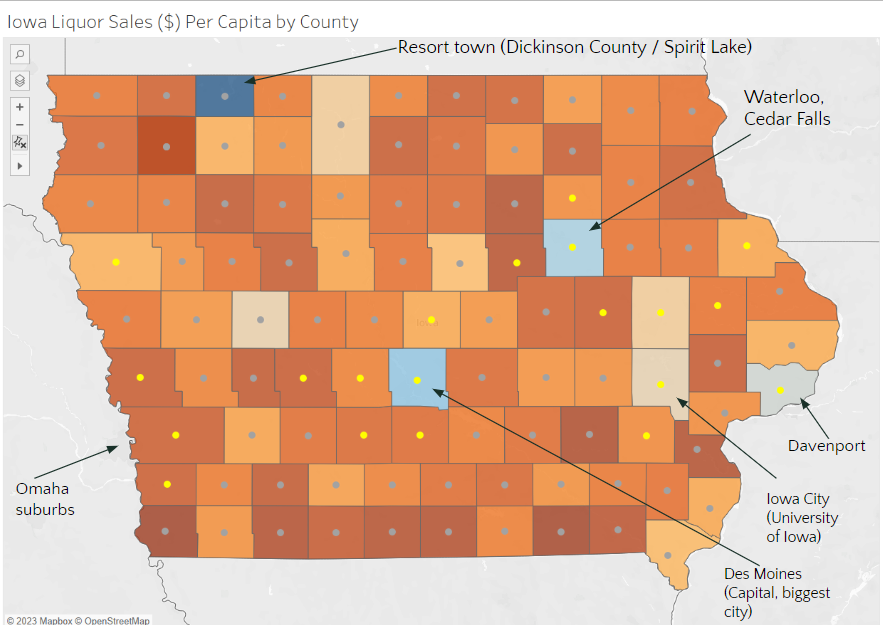

Our first tableau graph shows annual liquor sales per capita by county (higher counties in blue, lower counties in orange). A yellow dot indicates that a county is considered urban by the US Office of Management & Budget (OMB). Important cities/regions are annotated. 

Dickinson County (NW Iowa), which is home to a major vacation destination and resort town called Spirit Lake, appears that it could be making our results harder to interpret, so we remove it for the following graph.

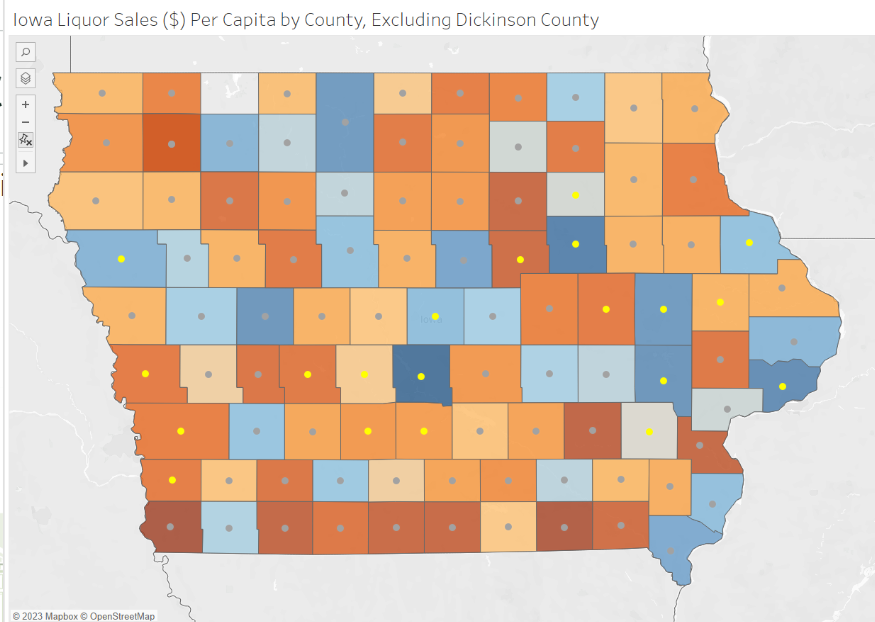

The above graph makes it somewhat difficult to discern any specific pattern, so we begin to use bar graphs to dive further into our data.

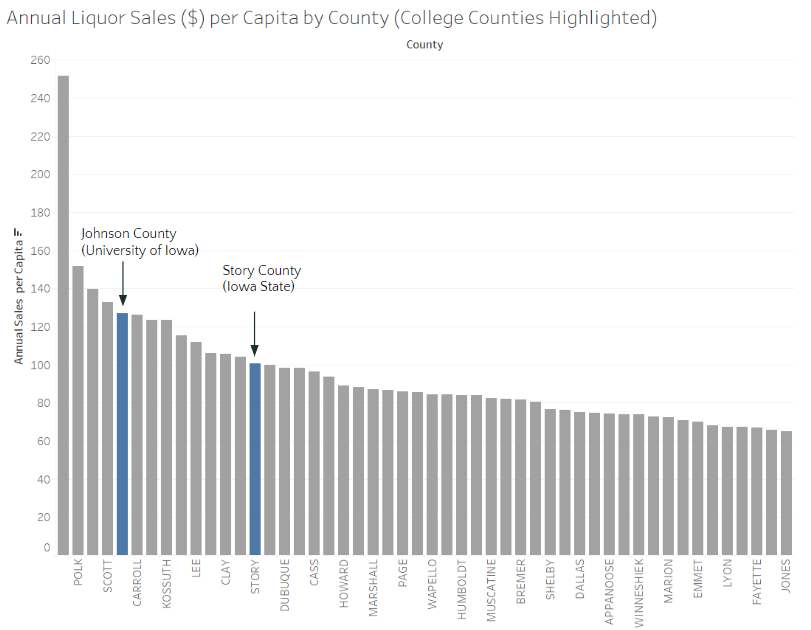

The graph above shows that the two counties that house the major Iowa college have above average rates on spending on liquor. It should be noted that Iowa has 99 counties and each of the bar graphs created for this project only shows the top 50 for liquor spending per capita per year. Next we will analyze Liquor sales in urban vs non-urban areas.

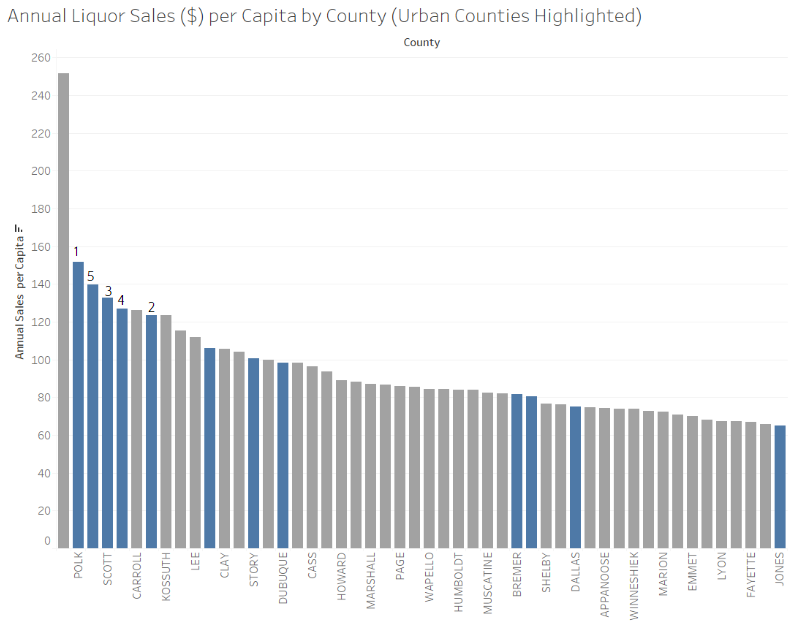

We can see that of the top 7 counties in liquor spending per capita, 5 most are Iowa's most populous counties (see the number above the bars for county population ranking). After the top 5 biggest counties are accounted for, how urban a county is appears to impact influence alcohol spending far less. Urban consumers could be spending more money on liquor for several reasons, including higher per capita income, busier nightlifes, and potential preference for beer over liquor in rural areas. Next we will analyze liquor sales in Iowa's border counties.

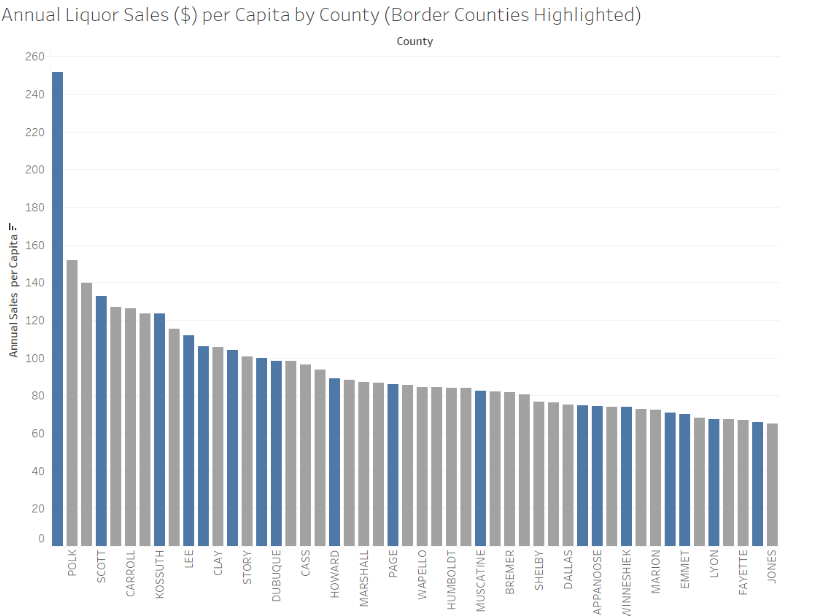

The graph of border vs. non-border counties has no discernable pattern. However, if we look at the Iowa counties map again, we see some patterns emerge.

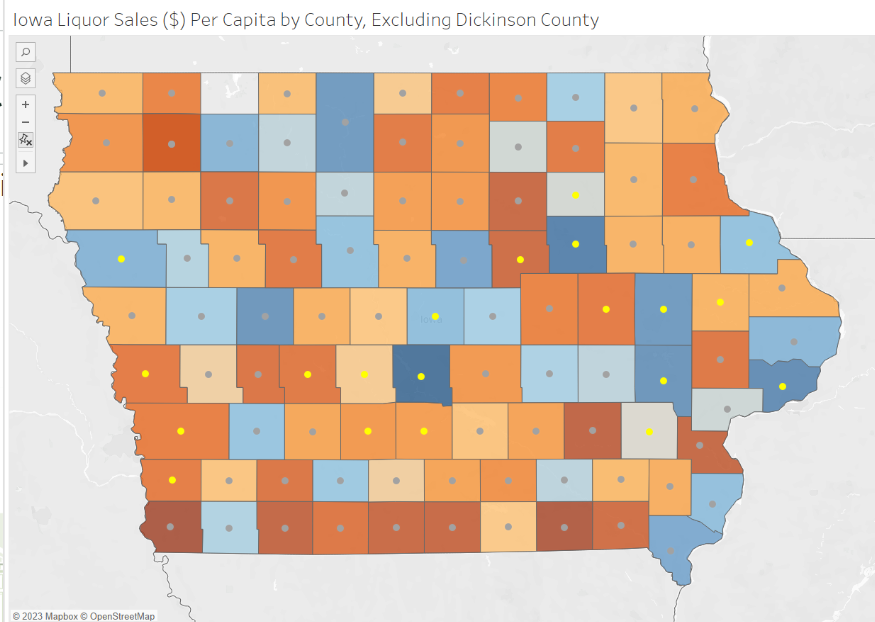

We can pretty clearly see that liquor sales are very low along the southern Missouri-Iowa border. Additionally, sales along the southwestern Nebraska-Iowa border appear lower than the rest of the state. Thus, we decided to look at liquor taxes by state to see if Iowans living near the border cross into Missouri and Nebraska to buy cheaper liquor.

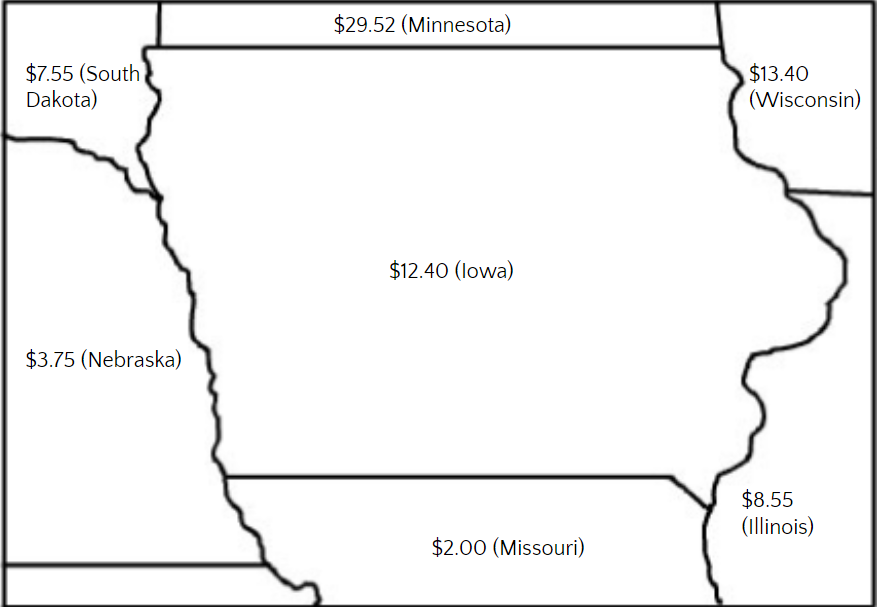

The above map, which shows state liquor tax per gallon of distilled liquor, shows that Missouri and Nebraska have much lower liquor taxes (and likely cheaper liquor). Other states' liquor taxes are mostly similar to Iowa, except Minnesota's, which is much higher. Thus, our hypothesis that Iowans near the Nebraska and especially Missouri borders cross state lines to purchase liquor is likely correct. 

## Final Location Recommendations
### College counties have above average liquor spending, though this may be due to their urbanness 
### Iowa's top 5 urban counties (Polk, Linn, Black Hawk, Scott, & Johnson) are a safe bet 
#### Higher risk, higher reward counties include Dickinson (resort/vacation destination) or high-spending rural counties like Kossuth and Carroll
### Avoid the Missouri and Nebraska borders 

# Challenges

#### Size of the data
Working locally with the data causes issues as it would take 2+ minutes to save or open the Tableau file each time and 10+ minutes to upload/download; this made it hard to share work in real time.

#### Lack of granularity of our analysis
Initially, we attempted to focus on ZIP codes for colleges which would have allowed us to include several other colleges like the University of Northern Iowa, Upper Iowa University, & Drake. However, we could not find a reliable source for population by ZIP code since this is a USPS defined, not a census defined region. Additionally, several ZIP codes spill into other states and many appeared to be missing from the data (see the map below with college ZIP codes highlighted). Moreover, it was very time consuming to find and tag ZIP codes manually 


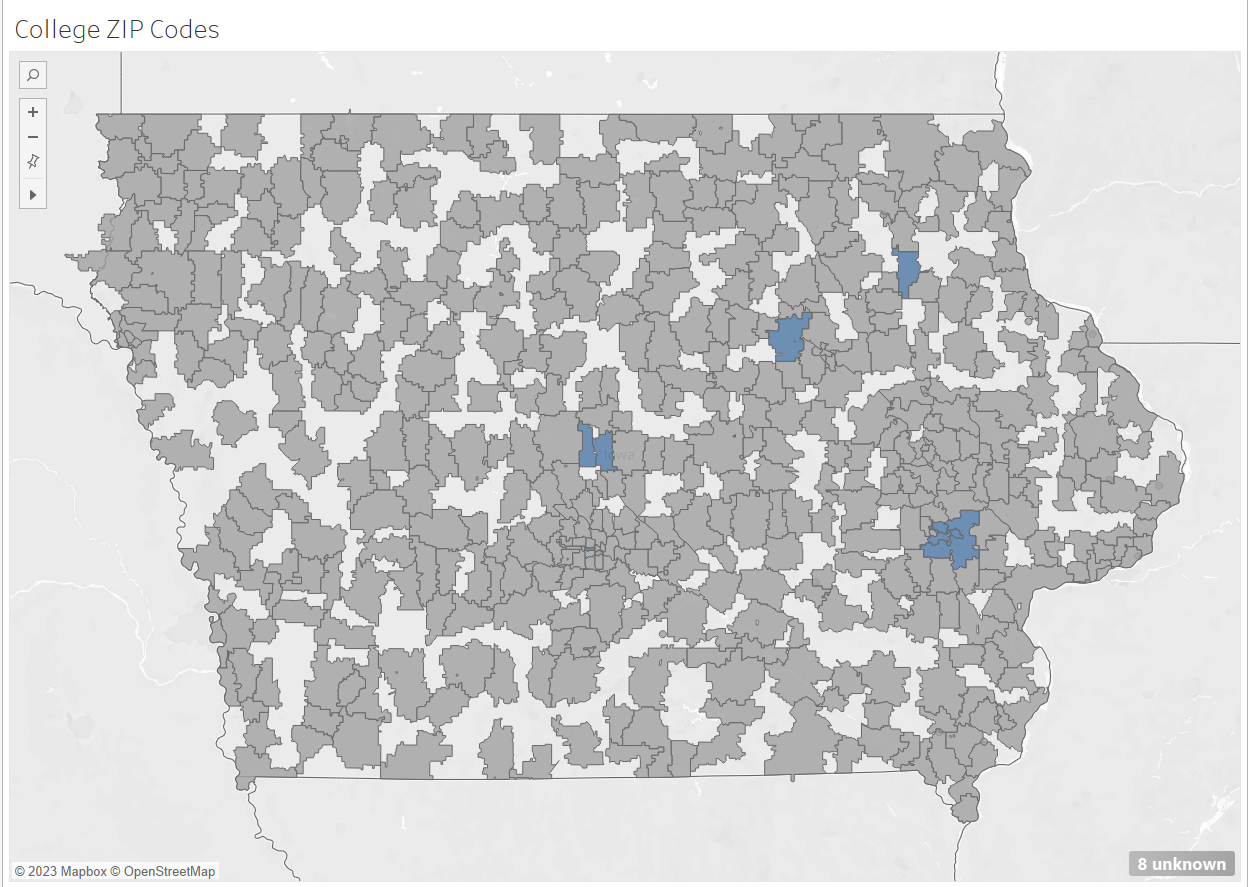